# Intro to pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.0.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [ ]:
ser_city = pd.Series(['Amritsar', 'Ludhiana', 'Patiala'])

In [ ]:
print(type(ser_city))
print(ser_city)

<class 'pandas.core.series.Series'>
0    Amritsar
1    Ludhiana
2     Patiala
dtype: object


`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
city_names = pd.Series(['Amritsar', 'Ludhiana', 'Patiala'])
population = pd.Series([2490656, 3498756, 1895838])

#pd.DataFrame(data=None, index: Union[Collection, NoneType]=None, columns: Union[Collection, NoneType]=None, 
# dtype: Union[str, numpy.dtype, _ForwardRef('ExtensionDtype'), NoneType]=None, copy: bool=False)

citypopdf = pd.DataFrame({ 'City name': city_names, 'Population': population })

In [ ]:
print(type(citypopdf) )
print(citypopdf)


<class 'pandas.core.frame.DataFrame'>
  City name  Population
0  Amritsar     2490656
1  Ludhiana     3498756
2   Patiala     1895838


In [ ]:
import numpy as np

data = np.array(['a','b','c','d'])
s1 = pd.Series(data)


In [ ]:
print (type(s1))
print(s1)

<class 'pandas.core.series.Series'>
0    a
1    b
2    c
3    d
dtype: object


In [ ]:
data = np.array(['a','b','c','d'])
s1 = pd.Series(data , index=[100,101,'hero',105])
print (s1)

100     a
101     b
hero    c
105     d
dtype: object


In [ ]:
s3 = pd.Series(5, index=[0, 1, 2, 3])
print (s3)

0    5
1    5
2    5
3    5
dtype: int64


In [ ]:
s4 = pd.Series ( [1,2,300,"hero",5], index = ['a','b','c','d','e'] )
print (s4[0])
print (s4[:3])
print (s4[-3:])
print (s4['d'])
print(s4[['d','a']])
print( type ( s4[['d','a']]))

1
a      1
b      2
c    300
dtype: object
c     300
d    hero
e       5
dtype: object
hero
d    hero
a       1
dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
s4 = pd.Series ( [1,2,300,"hero",5] )
print (s4[0])
print (s4[:3])
print (s4[-3:])
 

1
0      1
1      2
2    300
dtype: object
2     300
3    hero
4       5
dtype: object


In [ ]:
s5 = pd.Series({2:'a', 1:'b', 3:'c'})   #, index=[3, 2]
s6 = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2] )
 # s7 = pd.Series ( [1,2,3], index = ['a','b'] ) error
print (s5)
print (s6)


2    a
1    b
3    c
dtype: object
3    c
2    a
dtype: object


In [ ]:
dict1 =  { 'Amritsar' : 2490656, 'Ludhiana':3498756, 'Patiala':1895838, 'Jalandhar':2198453 , 'Bhatinda':2198453 } 
print (dict1) 
cityPopSe = pd.Series(dict1)
print (cityPopSe)

{'Amritsar': 2490656, 'Ludhiana': 3498756, 'Patiala': 1895838, 'Jalandhar': 2198453, 'Bhatinda': 2198453}
Amritsar     2490656
Ludhiana     3498756
Patiala      1895838
Jalandhar    2198453
Bhatinda     2198453
dtype: int64


In [ ]:
print(cityPopSe ['Amritsar'])
print(cityPopSe ['Amritsar' : 'Patiala'])
print(cityPopSe [:3])
print(cityPopSe [: 'Patiala'])  
print(cityPopSe [::2])  

2490656
Amritsar    2490656
Ludhiana    3498756
Patiala     1895838
dtype: int64
Amritsar    2490656
Ludhiana    3498756
Patiala     1895838
dtype: int64
Amritsar    2490656
Ludhiana    3498756
Patiala     1895838
dtype: int64
Amritsar    2490656
Patiala     1895838
Bhatinda    2198453
dtype: int64


### Dataframe

In [ ]:
#dataframe
df1 = pd.DataFrame([1,2,3,4] )
data = [['Amit',10],['Sumit',12],['Himmat',13]]
df2 = pd.DataFrame(data ) #,columns=['Name','Rollno'])
df3 = pd.DataFrame(data   , columns=['Name','Rollno'])
print(df1)
print(df2)
print(df2[1])

print (df3)
#print entire data of Name column
print(df3[ 'Name'])
#print name of first row indicated by 0 offset
print(df3[ 'Name'][0])


   0
0  1
1  2
2  3
3  4
        0   1
0    Amit  10
1   Sumit  12
2  Himmat  13
0    10
1    12
2    13
Name: 1, dtype: int64
     Name  Rollno
0    Amit      10
1   Sumit      12
2  Himmat      13
Amit


In [ ]:
print (df3) ; print ("\n")
#print name of first two row  
print(df3[ 'Name'][:2])
print(df3[ 'Name'][1:3])

     Name  Rollno
0    Amit      10
1   Sumit      12
2  Himmat      13


0     Amit
1    Sumit
Name: Name, dtype: object
1     Sumit
2    Himmat
Name: Name, dtype: object


In [ ]:
data = [['Amit',10],['Sumit',12],['Himmat',13]]
df4 = pd.DataFrame(data , columns=['Name','Rollno'], index = ['rank1','rank2','rank3'])
print (df4)
print(df4 ['Name']["rank2"])
print(df4 ['Rollno']["rank2"])
#fetch the entire row/tuple(all the column values) having index as rank2
#print(df4[:]["rank2"] )
# print(df4.iloc[1])

         Name  Rollno
rank1    Amit      10
rank2   Sumit      12
rank3  Himmat      13
Sumit
12


In [ ]:
print(df4.describe())

          Rollno
count   3.000000
mean   11.666667
std     1.527525
min    10.000000
25%    11.000000
50%    12.000000
75%    12.500000
max    13.000000


In [ ]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
df5 = pd.DataFrame(data)

print (df5)

   a  b
0  0  0
1  1  2
2  2  4


In [ ]:
def fact (n):
  res = 1
  for i in range (1,n+1) : 
    res = res * i

  return res

# create dataframe of first 100 natural numbers and their factorial
data = [{'Number': i, 'Factorial': fact(i)} for i in range(0,10)]
df6 = pd.DataFrame(data)

print (df6)

   Number  Factorial
0       0          1
1       1          1
2       2          2
3       3          6
4       4         24
5       5        120
6       6        720
7       7       5040
8       8      40320
9       9     362880


## Loading Data

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [ ]:
import pandas as pd
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [ ]:
#california_housing_dataframe.head()
california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d45a6ac8>]],
      dtype=object)

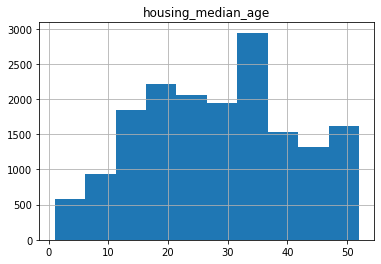

In [ ]:
california_housing_dataframe.hist('housing_median_age')

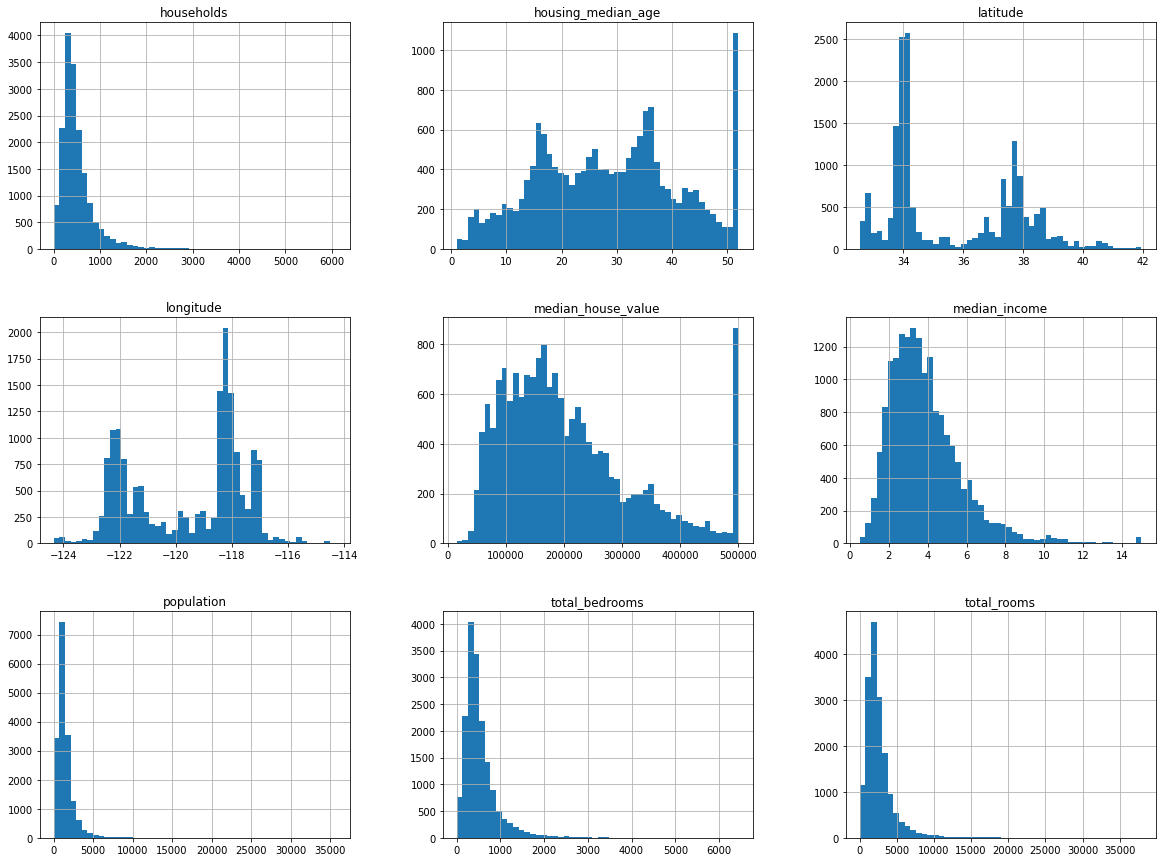

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
#hist(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, 
#             ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, **kwargs)

california_housing_dataframe.hist(bins=50, figsize=(20,15))
plt.show()

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

NameError: ignored

In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'Ludhiana'

In [ ]:
print(type(cities[0:2]))
cities[0:2]

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
population / 1000.

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [ ]:
import numpy as np

np.log(population)

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,Amritsar,2490656,46.87,53139.662897
1,Ludhiana,3498756,176.53,19819.611397
2,Patiala,1895838,97.92,19361.090686


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [ ]:
# Your code here

### Solution

Click below for a solution.

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

In [ ]:
cities.index

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [ ]:
cities.reindex([2, 0, 1])

Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [ ]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [ ]:
cities.reindex([0, 4, 5, 2])

This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.